### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import warnings

### Loading the dataset

In [2]:
dataset = pd.read_csv("Optimized_Placement_Dataset_with_Noise.csv")
dataset.head()

,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,Hunter Roberts,43384,83,3.940755,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,3,25.8,20,Civil Engineering,11.08
1,Christopher Burton,79402,159,4.663760,Yes,Yes,No,Yes,No,No,Yes,No,Yes,No,2,22.3,20,Mechanical Engineering,16.77
2,Laura Calderon,97041,346,4.454998,No,Yes,No,Yes,Yes,No,No,Yes,No,No,2,23.7,23,Electrical Engineering,20.70
3,Karen Williams,83487,10,5.000000,No,No,No,No,No,No,No,No,Yes,Yes,5,21.0,18,Computer Science,10.73
4,Brian Ortega,42073,257,8.455105,Yes,No,No,No,No,NaN,No,Yes,Yes,No,4,26.2,18,Computer Science,25.06


In [3]:
print("The shape of the dataset available is : ", dataset.shape)
# Considering 10000 rows from this dataset to perform the Algorithm
dataset = dataset.iloc[:30000,:]

# removing irrelevant values form the dataset
if 'Name of Student' in dataset.columns and 'Roll No.' in dataset.columns:
  dataset = dataset.drop(columns=['Name of Student', 'Roll No.'])
print(dataset.head(2))

The shape of the dataset available is :  (220000, 19)
   No. of DSA questions      CGPA Knows ML Knows DSA Knows Python  \
0                    83  3.940755      Yes        No          Yes   
1                   159  4.663760      Yes       Yes           No   

  Knows JavaScript Knows HTML Knows CSS Knows Cricket Knows Dance  \
0              Yes         No        No            No         Yes   
1              Yes         No        No           Yes          No   

  Participated in College Fest Was in Coding Club  No. of backlogs  \
0                          Yes                 No                3   
1                          Yes                 No                2   

   Interview Room Temperature  Age of Candidate   Branch of Engineering  \
0                        25.8                20       Civil Engineering   
1                        22.3                20  Mechanical Engineering   

   Placement Package  
0              11.08  
1              16.77  


### Visualizing outliners

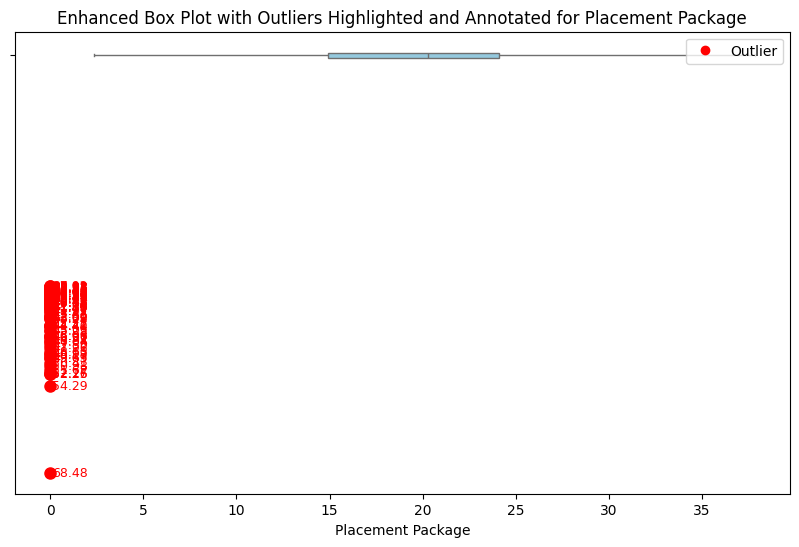

In [4]:
# Calculate IQR for detecting outliers
Q1 = dataset['Placement Package'].quantile(0.25)
Q3 = dataset['Placement Package'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = dataset[(dataset['Placement Package'] < lower_bound) | (dataset['Placement Package'] > upper_bound)]

# Create the box plot without outliers using showfliers=False
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Placement Package', color='skyblue', showfliers=False)
plt.title('Enhanced Box Plot with Outliers Highlighted and Annotated for Placement Package')

# Plot each outlier as a red dot with annotations
for value in outliers['Placement Package']:
    plt.plot(0, value, 'ro', markersize=8)  # Red dot for each outlier
    plt.text(0.1, value, f'{value:.2f}', color='red', va='center', fontsize=9)  # Display value near the dot

# Adding a manual legend for outliers
plt.plot([], [], 'ro', label='Outlier')  # Empty plot to add legend entry for 'Outlier'
plt.legend(loc='upper right')

# Customize labels
plt.xlabel('Placement Package')
plt.show()

### Removing Outliners

In [5]:
print("Outliers:", outliers['Placement Package'].tolist())
Q1 = dataset['Placement Package'].quantile(0.25)
Q3 = dataset['Placement Package'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
dataset = dataset[~((dataset['Placement Package'] < (Q1 - 1.5 * IQR)) | (dataset['Placement Package'] > (Q3 + 1.5 * IQR)))]


Outliers: [39.30008532998153, 40.01062478384932, 42.90096419404707, 47.04194999980385, 40.64801307055568, 49.69163409927432, 46.83835792400137, 41.15806359616764, 49.1652334199514, 39.23261757565805, 45.97810569883214, 48.65157511006226, 52.26487325668664, 41.10726700327832, 43.27538823836707, 46.09416486490289, 38.04664446941678, 42.81194529276945, 38.9, 39.7509789097924, 37.92, 39.55, 40.41828157101935, 41.91350289958315, 41.48956812327084, 41.3497102655146, 38.08, 46.05956573861625, 47.50375842238356, 38.02597739030456, 50.41439112690698, 39.01440112325096, 38.165553411875365, 40.04009521851378, 50.97627972950576, 38.26687318728432, 40.03164016941442, 41.13837882344209, 40.52851732915488, 38.94328727296248, 68.47777866138492, 43.08968085169533, 44.41201060535081, 39.548397616165225, 41.39868127215008, 38.554555021285815, 39.178311448234815, 41.18997928693343, 47.95504616947662, 39.04, 39.81971049560809, 38.21, 38.91583230263941, 40.45, 39.31657717310341, 46.31350575981615, 37.93, 48

### Checking for missing values

In [6]:
print(dataset.isnull().sum())
dataset = dataset.dropna()

No. of DSA questions              0
CGPA                              0
Knows ML                        489
Knows DSA                         0
Knows Python                    536
Knows JavaScript                500
Knows HTML                      505
Knows CSS                       491
Knows Cricket                    11
Knows Dance                      11
Participated in College Fest      0
Was in Coding Club                0
No. of backlogs                   0
Interview Room Temperature        0
Age of Candidate                  0
Branch of Engineering             0
Placement Package                 0
dtype: int64


In [7]:
# depedent variable y
y = dataset.iloc[:,-1].values
# independent variable X
X = dataset.iloc[:,:-1].values

In [8]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_mode.fit(X[:, 2:12])
X[:, 2:12] = imputer_mode.transform(X[:, 2:12])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean.fit(X[:, [0, 12, 13, 14]])
X[:, [0, 12, 13, 14]] = imputer_mean.transform(X[:, [0, 12, 13, 14]])

print(X[0])
print(dataset.isnull().sum())

[83.0 3.940754618189354 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes'
 'No' 3.0 25.8 20.0 'Civil Engineering']
No. of DSA questions            0
CGPA                            0
Knows ML                        0
Knows DSA                       0
Knows Python                    0
Knows JavaScript                0
Knows HTML                      0
Knows CSS                       0
Knows Cricket                   0
Knows Dance                     0
Participated in College Fest    0
Was in Coding Club              0
No. of backlogs                 0
Interview Room Temperature      0
Age of Candidate                0
Branch of Engineering           0
Placement Package               0
dtype: int64


### Encoding independent variables

##### single value variables

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(2, 12):
  X[:, i] = le.fit_transform(X[:, i])
print(X)

[[83.0 3.940754618189354 1 ... 25.8 20.0 'Civil Engineering']
 [159.0 4.663760041251319 1 ... 22.3 20.0 'Mechanical Engineering']
 [346.0 4.454998411873437 0 ... 23.7 23.0 'Electrical Engineering']
 ...
 [63.0 3.5670194057257105 0 ... 27.3 24.0 'Computer Science']
 [236.0 5.141718928308238 1 ... 29.9 22.0 'Electrical Engineering']
 [193.0 5.065153910850011 1 ... 21.0 18.0 'Computer Science']]


##### multi-valued variables

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [15])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[0])

[1.0 0.0 0.0 0.0 83.0 3.940754618189354 1 0 1 1 0 0 0 1 1 0 3.0 25.8 20.0]


### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [4, 5, 16, 17, 18]

# Separate the columns to scale and the remaining columns
X_train_to_scale = X_train[:, columns_to_scale]
X_train_rest = np.delete(X_train, columns_to_scale, axis=1)
# Apply scaling only to the specified columns
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_to_scale)
# Merge scaled and unscaled columns back in the original order
X_train[:, columns_to_scale] = X_train_scaled

# for test data
X_test_to_scale = X_test[:, columns_to_scale]
X_test_rest = np.delete(X_test, columns_to_scale, axis=1)
X_test_scaled = sc.transform(X_test_to_scale)
X_test[:, columns_to_scale] = X_test_scaled
print(X_train[0])

[1.0 0.0 0.0 0.0 1.770925065263867 0.31212407744385334 0 0 0 1 0 1 0 0 0 0
 -0.5459887142235176 1.3268607814545892 0.21277510637869462]


In [13]:
print(y_train.shape)
print(np.isnan(y_train).any())
print(np.unique(y_train))
print(X_train.shape, y_train.shape)

(21980,)
False
[ 2.37340356  2.99581598  3.19450816 ... 37.74       37.80539064
 37.82280415]
(21980, 19) (21980,)


### testing accuracy 

In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define regression models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression()
}

# Evaluate each model
for name, model in models.items():
    print(f"{name}:")
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-validation MSE: {-cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")
    
    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error: {mae:.3f}")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"R-squared: {r2:.3f}")
    print("\n" + "="*60 + "\n")

Random Forest:
Cross-validation MSE: 3.105 (+/- 0.196)
Mean Absolute Error: 0.762
Mean Squared Error: 2.895
R-squared: 0.937


Gradient Boosting:
Cross-validation MSE: 2.689 (+/- 0.216)
Mean Absolute Error: 0.596
Mean Squared Error: 2.574
R-squared: 0.944


Support Vector Regression:
Cross-validation MSE: 2.545 (+/- 0.203)
Mean Absolute Error: 0.395
Mean Squared Error: 2.459
R-squared: 0.946


K-Nearest Neighbors:
Cross-validation MSE: 5.656 (+/- 0.257)
Mean Absolute Error: 1.559
Mean Squared Error: 5.535
R-squared: 0.879


Decision Tree:
Cross-validation MSE: 6.379 (+/- 0.304)
Mean Absolute Error: 1.115
Mean Squared Error: 5.804
R-squared: 0.873


Linear Regression:
Cross-validation MSE: 2.528 (+/- 0.203)
Mean Absolute Error: 0.387
Mean Squared Error: 2.441
R-squared: 0.947


